In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import intake
%matplotlib inline
#from tqdm.autonotebook import tqdm
import time
import cftime
#import cdo
#cdo = cdo.Cdo()
import xesmf as xe

In [2]:
cat_url = "/space/hall4/sitestore/eccc/crd/CMIP6/final/canesm_final.json" #use this inside of CCCma science net
#cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"       # use this outside of CCCma / for public data
col = intake.open_esm_datastore(cat_url)

In [6]:
query = dict(experiment_id=['faf-stress'], table_id=['Amon'], member_id='r1i1p2f1',
             variable_id=['uas'], source_id='CanESM5')
cat = col.search(**query)

ds_faf = cat.to_dataset_dict()['FAFMIP.CCCma.CanESM5.faf-stress.Amon.gn']

query = dict(experiment_id=['piControl'], table_id=['Amon'], member_id='r1i1p2f1',
             variable_id=['uas'], source_id='CanESM5')

cat = col.search(**query)

ds_pi =  cat.to_dataset_dict()['CMIP.CCCma.CanESM5.piControl.Amon.gn']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


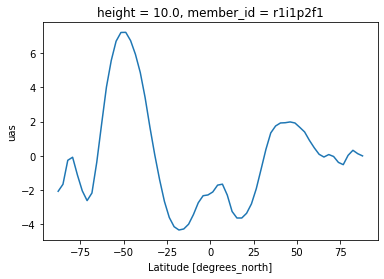

In [7]:
ds_pi.mean(dim=['time', 'lon'])['uas'].plot(label='piControl')
ds_faf.mean(dim=['time', 'lon'])['uas'].plot(label='faf-stress')

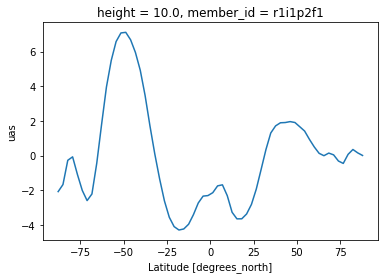

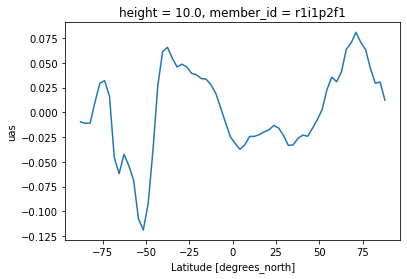

In [9]:
(ds_faf.mean(dim=['time', 'lon']) - ds_pi.mean(dim=['time', 'lon']))['uas'].plot()